In [2]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

In [3]:
t = np.linspace(0.001, 0.119,200)
fq = np.linspace(1/min(t), 1/max(t), 1000)

y1 = 9.8*np.cos(2*pi*200*t[:]+0)
y2 = 7.6*np.cos((2*pi*145*t[:]) + (30*(pi/180)))
y3 = 5.4*np.cos((2*pi*93*t[:]) + (70*(pi/180)))
y4 = 3.2*np.cos((2*pi*58*t[:]) + (160*(pi/180)))
y5 = np.cos((2*pi*35*t[:]) + (320*(pi/180)))

l = y1+y2+y3+y4+y5

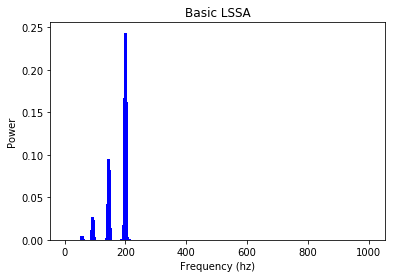

In [23]:
s = np.empty([len(fq), 1])
for i in range(len(fq)):
    A = []
    for j in t:
        a1 = sin(2*pi*fq[i]*j)
        a2 = cos(2*pi*fq[i]*j)
        amat = [a1, a2]
        A.append(amat)

    xhat = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(A), A)), np.transpose(A)), l)
    lhat = np.dot(A, xhat)
    s1 = np.dot(np.transpose(l), lhat)
    s2 = 1/np.dot(np.transpose(l), l)
    ss = pow(np.dot(s1, s2), 2)
    s[i] = ss    
width = 10.00
fig, ax = plt.subplots()
rects = ax.bar(fq, np.asarray(s).reshape(-1), width, color='b')

ax.set_ylabel('Power')
ax.set_xlabel('Frequency (hz)')
ax.set_title('Basic LSSA')
plt.show()